# GROUPE 10 inf3236
. TCHOUPE KENGNE DEKEL JUNIOR 19M2394 \
. NKOUNGHAWE TOMEYUM ROSALIE CORINE 19M2333 \
. BAPOLA AMASSA RICHIL PERRIN 19M2661 \
. OBAMA MEVOUNGOU DRYSTAN GODGIFT 19M2132 \


### TP1: implémentation des resaux de neurones


## Importation des bibliothèques

In [ ]:
import pylab as pylab
import os
import numpy as np
import pandas as pd
from imageio import imread # Je n'ai pas utilisé scipy.misc qui peut bien etre utilisé en installant Pillow avec la commande
# pip install pillow
from sklearn.metrics import precision_score
import tensorflow as tf
import keras
from tensorflow.keras import layers


In [ ]:
# Afin de controler le caratère aléatoire de nos modèles
seed = 128
rng = np.random.RandomState(seed)

#Définir les chemins d'accès
root_dir = os.path.abspath('./')
data_dir = os.path.join(root_dir,'data')
sub_dir = os.path.join(root_dir, 'sub')

train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

sample_submission = pd.read_csv(os.path.join(sub_dir, 'sample_submission.csv'))
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [ ]:
test.keys()

Index(['filename'], dtype='object')

### Représentation des données: lecture de notre image et affichage

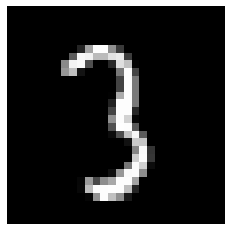

In [ ]:
img_name = rng.choice(train.filename)
filepath = os.path.join( 'images', 'train', img_name)
img = imread(filepath, as_gray = True)
pylab.imshow(img, cmap = 'gray') # On rend notre image en noir sur blanc, on applique ce qu'on appelle le filtrage
pylab.axis('off')
pylab.show()

## Stockons toutes nos images sous forme de tableaux numpy

In [ ]:
temp = []
# Ajout des données de formation dans la liste
for img_name in train.filename:
    image_path = os.path.join('images', 'train', img_name)
    img = imread(image_path, as_gray = True)
    img = img.astype('float32')
    temp.append(img) # On ajoute effectivement les images dans la liste temp

train_x = np.stack(temp) # Afin de joindre la séquence de  tableaux de mm dimension le long du nouvel axe


train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

# Ajout des données de test dans la liste 
temp = []
for img_name in test.filename:
    image_path = os.path.join('images', 'test', img_name)
    img = imread(image_path, as_gray = True )
    img = img.astype('float32')
    temp.append(img) # Ajout des données de test à la suite des données d'entrainement fait plus haut
    
test_x = np.stack(temp) # Afin de joindre la séquence de  tableaux de mm dimension le long du nouvel axe

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')


In [ ]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)
print(train_y) # Affiche pour chaque label, les différentes valeurs de pixels, un label est une image

# et cette image qui est une matrice de valeurs représentant un signal: 0 pour noir et 1 pour blanc en terme de couleur des pixels
# On attribut les classes à chaque image de notre jeu d'entrainement en utilisant la méthode du 
# One-hold-encoding

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Créons un ensemble de validation pour tester le bon fonctionnement du modèle

In [ ]:
# 70% pour la formation et 30% pour la validation de la formation

split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [ ]:
#train.label.iloc[split_size:] # Extraction d'une colonne (ix est obsolète)

## Construction du modèle de réseaux de neurones

*Architecture de notre modèle*:

3 couches: entrée, cachée et sortie

**entrée**: nombre de neurones 28x28 = 784 car notre image a cette taille, ce nombre de fragments, qui représente le nombre de caractéristiques

**sortie**: nombre de neurones 10x1 = 10 car on a 10 classes cad les chiffres allant de 0 à 10 et ce sont ces chiffres que nous désirons identifier sur ces images avec un modèle qui pourra mieux le faire et très rapidement 

*Optimiseur*: nous utiliseront **Adam** comme optimiseur car c'est une variante efficace de l'algorithme de descente de gradient 

In [ ]:
# Définition des variables
input_num_units = 784
hidden_num_units = 50
output_num_units = 10
epochs = 5
batch_size = 128

# Imporons les modules keras

# Créons un modèle

model = keras.Sequential([
    #Dense(output_dim = hidden_num_units, input_dim = input_num_units, activation = 'relu') 
    # On utilise la fonction d'activation ReLu
    #Dense(output_dim = output_num_units, input_dim = hidden_num_units, activation = 'softmax')
    # On utilise la fonction d'activation softmax pour cette Dense
    layers.Dense(784, activation="relu", name="layer1"),
    layers.Dense(50, activation="relu", name="layer2"),
    layers.Dense(10,  activation="softmax",name="layer3"),
    
    
])

# Compilons le modèle avec les attributs nécessaires
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

####  Il est temps de former notre modèle

In [ ]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.1389 - val_accuracy: 0.9730
Epoch 2/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0095 - accuracy: 0.9972 - val_loss: 0.1246 - val_accuracy: 0.9752
Epoch 3/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.1192 - val_accuracy: 0.9779
Epoch 4/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.1193 - val_accuracy: 0.9781
Epoch 5/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.1121 - val_accuracy: 0.9789


## ÉTAPE 3 : Évaluation du modèle
Pour tester notre modèle de nos propres yeux, visualisons ses prédictions



Prediction is:  3


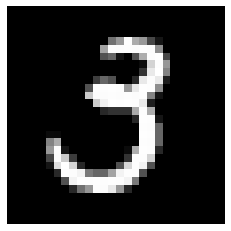

In [ ]:
pred = model.predict(test_x)
classes=np.argmax(pred,axis=1)
img_name = rng.choice(test.filename)
filepath = os.path.join('images', 'test', img_name)

img = imread(filepath, as_gray=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print ("Prediction is: ", classes[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()



In [ ]:
 #Nous voyons que notre modèle fonctionne bien même en étant très simple. Maintenant, nous créons une soumission avec notre modèle

#sample_submission.insert(2,"filename",test.filename)
#sample_submission.insert(3,"label2",pred)
#sample_submission.to_csv(os.path.join(sub_dir, 'sub02.csv'), index=False)

## Hyperparamètres à surveiller dans les réseaux de neurones

Type d'architecture

nombre de couches

nombre de neurones dans une couche

paramètres de régularisation

taux d'apprentissage

type de technique d'optimisation

taux d'abandon

partage du poids

## Implémentation du modèle de réseau de neurones en tenant compte de ces hyperparamètres à surveiller

## Importation des bibliothèques

In [ ]:
import pylab as pylab

import os
import numpy as np
import pandas as pd
from imageio import imread
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer


In [ ]:
# Controle de l'aléa
seed = 128
rng = np.random.RandomState(seed)

#Définir les chemins d'accès
root_dir = os.path.abspath('./')
data_dir = os.path.join(root_dir,'data')
sub_dir = os.path.join(root_dir, 'sub')

train = pd.read_csv(os.path.join(data_dir,'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

sample_submission = pd.read_csv(os.path.join(sub_dir, 'sample_submission.csv'))
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### Lire les jeux de données et les convertir en forme utilisable

In [ ]:
temp = []
# Ajout des données de formation dans la liste
for img_name in train.filename:
    image_path = os.path.join('images', 'train', img_name)
    img = imread(image_path, as_gray = True)
    img = img.astype('float32')
    temp.append(img) # On ajoute effectivement les images dans la liste temp

train_x = np.stack(temp) # Afin de joindre la séquence de  tableaux de mm dimension le long du nouvel axe


train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

# Ajout des données de test dans la liste 
temp = []
for img_name in test.filename:
    image_path = os.path.join('images', 'test', img_name)
    img = imread(image_path, as_gray = True )
    img = img.astype('float32')
    temp.append(img) # Ajout des données de test à la suite des données d'entrainement fait plus haut
    
test_x = np.stack(temp) # Afin de joindre la séquence de  tableaux de mm dimension le long du nouvel axe

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

train_y = keras.utils.np_utils.to_categorical(train.label.values) # Les labels des données de notre jeu d'entrainement



###  Divisez nos données de train en formation (train_x)  et validation(val_x)

In [ ]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

### Augmentons le nombre de neurones dans notre couche cachée afin de rendre le modèle plus large

In [ ]:
# Définition des variables

input_num_units = 784
hidden_num_units = 500 # augmentation du nombre de neurones de la couche cachée
output_num_units = 10
epochs = 5
batch_size = 128

model =keras.Sequential([
       layers.Dense(784, activation="relu", name="layer1"),
       layers.Dense(500, activation="relu", name="layer2"),
       layers.Dense(10,  activation="softmax",name="layer3"),
    # On utilise la fonction d'activation softmax pour cette Dense
    
])

model


### Testons le modèle

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_500 = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 5s 18ms/step - loss: 0.2618 - accuracy: 0.9245 - val_loss: 0.1469 - val_accuracy: 0.9541
Epoch 2/5
268/268 [==============================] - 4s 16ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.1080 - val_accuracy: 0.9670
Epoch 3/5
268/268 [==============================] - 4s 16ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.1047 - val_accuracy: 0.9674
Epoch 4/5
268/268 [==============================] - 4s 16ms/step - loss: 0.0368 - accuracy: 0.9879 - val_loss: 0.0989 - val_accuracy: 0.9722
Epoch 5/5
268/268 [==============================] - 5s 17ms/step - loss: 0.0251 - accuracy: 0.9915 - val_loss: 0.1092 - val_accuracy: 0.9720


### Augmentons la profondeur de notre modèle maintenant c'est à dire le nombre de couches 

In [ ]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

model =keras.Sequential([
       layers.Dense(784, activation="relu", name="layer1"),
       layers.Dense(50, activation="relu", name="layer2"),
       layers.Dense(50, activation="relu", name="layer3"),
       layers.Dense(50, activation="relu", name="layer4"),
       layers.Dense(50, activation="relu", name="layer5"),
       layers.Dense(50, activation="relu", name="layer6"),
       layers.Dense(10,  activation="softmax",name="layer7"),
    # On utilise la fonction d'activation softmax pour cette Dense
    
])

### Apprentisage et test du modèle

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))


Epoch 1/5
268/268 [==============================] - 3s 11ms/step - loss: 0.4446 - accuracy: 0.8684 - val_loss: 0.2159 - val_accuracy: 0.9369
Epoch 2/5
268/268 [==============================] - 3s 10ms/step - loss: 0.1463 - accuracy: 0.9568 - val_loss: 0.1362 - val_accuracy: 0.9594
Epoch 3/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0934 - accuracy: 0.9723 - val_loss: 0.1241 - val_accuracy: 0.9616
Epoch 4/5
268/268 [==============================] - 3s 10ms/step - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.1040 - val_accuracy: 0.9707
Epoch 5/5
268/268 [==============================] - 3s 11ms/step - loss: 0.0471 - accuracy: 0.9858 - val_loss: 0.1009 - val_accuracy: 0.9710


### Interprétation

On se rend compte que nous n'avons pas atteint l'objectif

Pour résoudre, on applique **l'abandon** qui consiste à désactiver aléatoirement les parties du modèle afin qu'il ne sur apprenne

## Mise en oeuvre de l'abandon pour résoudre le problème

In [ ]:
# Définition des variables
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2


model =keras.Sequential([
       layers.Dense(input_num_units, activation="relu", name="layer1"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden1_num_units, activation="relu", name="layer2"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden2_num_units, activation="relu", name="layer3"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden3_num_units, activation="relu", name="layer4"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden4_num_units, activation="relu", name="layer5"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden5_num_units, activation="relu", name="layer6"),
       layers.Dropout(dropout_ratio),
       layers.Dense(output_num_units,  activation="softmax",name="layer7"),
       layers.Dropout(dropout_ratio),
    # On utilise la fonction d'activation softmax pour cette Dense
    
])

### Vérifions maintenant notre exactitude

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))


Epoch 1/5
268/268 [==============================] - 5s 15ms/step - loss: 4.0264 - accuracy: 0.5350 - val_loss: 0.3129 - val_accuracy: 0.9149
Epoch 2/5
268/268 [==============================] - 4s 14ms/step - loss: 3.4634 - accuracy: 0.7252 - val_loss: 0.2311 - val_accuracy: 0.9411
Epoch 3/5
268/268 [==============================] - 4s 15ms/step - loss: 3.4363 - accuracy: 0.7508 - val_loss: 0.1978 - val_accuracy: 0.9503
Epoch 4/5
268/268 [==============================] - 4s 14ms/step - loss: 3.3813 - accuracy: 0.7592 - val_loss: 0.1646 - val_accuracy: 0.9605
Epoch 5/5
268/268 [==============================] - 4s 14ms/step - loss: 3.3924 - accuracy: 0.7638 - val_loss: 0.1753 - val_accuracy: 0.9597


Il semble que notre modèle ne fonctionne pas assez bien. L’une des raisons peut être que nous n’entraînons pas notre modèle à son plein potentiel.

Augmentons nos époques de formation à 50 et vérifions-le!

### Ajout du nombre d'époques pour résoudre le problème

In [ ]:
# Définition des variables
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128

dropout_ratio = 0.2


model =keras.Sequential([
       layers.Dense(input_num_units, activation="relu", name="layer1"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden1_num_units, activation="relu", name="layer2"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden2_num_units, activation="relu", name="layer3"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden3_num_units, activation="relu", name="layer4"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden4_num_units, activation="relu", name="layer5"),
       layers.Dropout(dropout_ratio),
       layers.Dense(hidden5_num_units, activation="relu", name="layer6"),
       layers.Dropout(dropout_ratio),
       layers.Dense(output_num_units,  activation="softmax",name="layer7"),
       layers.Dropout(dropout_ratio),
    # On utilise la fonction d'activation softmax pour cette Dense
    
])

### Vérifions l'exactitude du modèle avec le nombre d'époques augmenté

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))


Epoch 1/50
268/268 [==============================] - 5s 15ms/step - loss: 4.0758 - accuracy: 0.4981 - val_loss: 0.3267 - val_accuracy: 0.9146
Epoch 2/50
268/268 [==============================] - 4s 14ms/step - loss: 3.5212 - accuracy: 0.7188 - val_loss: 0.2215 - val_accuracy: 0.9433
Epoch 3/50
268/268 [==============================] - 4s 14ms/step - loss: 3.4398 - accuracy: 0.7490 - val_loss: 0.1678 - val_accuracy: 0.9563
Epoch 4/50
268/268 [==============================] - 4s 15ms/step - loss: 3.3268 - accuracy: 0.7647 - val_loss: 0.1615 - val_accuracy: 0.9597
Epoch 5/50
268/268 [==============================] - 4s 14ms/step - loss: 3.3452 - accuracy: 0.7697 - val_loss: 0.1477 - val_accuracy: 0.9620
Epoch 6/50
268/268 [==============================] - 4s 14ms/step - loss: 3.3197 - accuracy: 0.7730 - val_loss: 0.1331 - val_accuracy: 0.9686
Epoch 7/50
268/268 [==============================] - 4s 14ms/step - loss: 3.2967 - accuracy: 0.7759 - val_loss: 0.1479 - val_accuracy: 0.9656